# **EDA - 1**
**About - Dataset:**

Here is the dataset link: Bike Details Dataset

The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for used bikes.

**Title: Bike Details Dataset**

**Source:**
The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale platforms.

**Description:**
The dataset comprises 1061 records of used bike listings. These records include details about the bike’s brand and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for resale value prediction, market analysis, and understanding buyer preferences.

The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive view of the second-hand bike market.

**Title: Bike Details Dataset**

name: Brand and model name of the bike (Categorical, e.g., ‘Royal Enfield Classic 350’, ‘Honda Dio’).

selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000).

year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015).

seller_type: Seller category, either ‘Individual’ or ‘Dealer’ (Categorical).

owner: Ownership history, e.g., ‘lat owner’, ‘2nd owner’ (Categorical).

km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000).

ex_showroom_price: Original showroom price in INR (Numeric, e.g., 1481140, 896430, etc.).

Key Notes:
The dataset contains 1061 records of used bikes.

Features include brand, price, year, seller type, ownership, km driven, and showroom price.

Useful for resale value prediction and market trend analysis.

Mix of numeric and categorical data types.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

bike_df = pd.read_csv('/content/BIKE DETAILS.csv')

In [2]:
# 1. What is the range of selling prices in the dataset?
# 2. What is the median selling price for bikes in the dataset?
min_price = bike_df['selling_price'].min()     # ₹5,000
max_price = bike_df['selling_price'].max()     # ₹7,60,000
median_price = bike_df['selling_price'].median()  # ₹45,000

print(f"Minimum Price: ₹{min_price}")
print(f"Maximum Price: ₹{max_price}")

Minimum Price: ₹5000
Maximum Price: ₹760000


In [3]:
# 3. What is the most common seller type?
bike_df['seller_type'].value_counts()
# Individual: 1055
# Dealer: 6


,count
seller_type,
Individual,1055
Dealer,6


In [4]:
# 4. How many bikes have driven more than 50,000 kilometers?
(bike_df['km_driven'] > 50000).sum()
# Output: 170


170

In [55]:
# 5. What is the average km_driven value for each ownership type?
bike_df.groupby('owner')['km_driven'].mean()


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [6]:
# 6. What proportion of bikes are from the year 2015 or older?
(bike_df['year'] <= 2015).sum() / len(bike_df)
# Output: ~56.6%


0.5664467483506126

In [7]:
# 7. What is the trend of missing values across the dataset?
bike_df.isnull().sum()


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [8]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?
bike_df.loc[bike_df['ex_showroom_price'].idxmax(), ['name', 'ex_showroom_price']]
# Harley-Davidson Street Bob → ₹12,78,000


,134
name,Harley-Davidson Street Bob
ex_showroom_price,1278000.0


In [9]:
# 9. What is the total number of bikes listed by each seller type?
bike_df['seller_type'].value_counts()
# Individual: 1055, Dealer: 6


,count
seller_type,
Individual,1055
Dealer,6


In [10]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_df = bike_df[bike_df['owner'] == '1st owner']
first_owner_df[['selling_price', 'km_driven']].corr()
# Correlation: -0.24 (moderate negative)


,selling_price,km_driven
selling_price,1.000000,-0.243482
km_driven,-0.243482,1.000000


In [12]:
# 11. Identify and remove outliers in the km_driven column using the IQR method
# After removing outliers

# Calculate IQR for km_driven
Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
km_no_outliers = bike_df[(bike_df['km_driven'] >= lower_bound) & (bike_df['km_driven'] <= upper_bound)]

rows_remaining = km_no_outliers.shape[0]  # 1022 rows remain

In [13]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price

bike_df['age'] = 2025 - bike_df['year']
bike_df.groupby('age')['selling_price'].mean()


,selling_price
age,
5,183333.333333
6,119689.511628
7,87660.374046
8,78894.736842
9,58469.018692
10,56500.000000
11,48668.131868
12,51136.986301
13,35748.400000


In [15]:
# Calculate the average selling price for each age group
avg_price_by_age = bike_df.groupby('age')['selling_price'].mean().reset_index()
avg_price_by_age = avg_price_by_age.rename(columns={'selling_price': 'avg_year_price'})

# Merge this average price back into the original DataFrame based on age
bike_df = pd.merge(bike_df, avg_price_by_age, on='age', how='left')

# Now, the 'avg_year_price' column exists and you can perform the comparison
bike_df[bike_df['selling_price'] > 1.5 * bike_df['avg_year_price']]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,avg_year_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,17,34289.285714
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,6,119689.511628
18,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,23000,148114.0,7,87660.374046
23,Jawa Standard,180000,2019,Individual,1st owner,2000,NaN,6,119689.511628
...,...,...,...,...,...,...,...,...,...
979,Royal Enfield Thunder 500,105000,2015,Individual,1st owner,5400,190000.0,10,56500.000000
981,Royal Enfield Thunder 350,105000,2013,Individual,1st owner,6900,150000.0,12,51136.986301
983,Royal Enfield Classic 350,100000,2015,Individual,1st owner,46500,147000.0,10,56500.000000
984,Royal Enfield Classic 500,95000,2014,Individual,1st owner,11500,175000.0,11,48668.131868


# **EDA – 2**
# **About - Dataset:**
Here is the dataset link: Car Sales
The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and consumer behavior.

**Title**: **Car Sale Dataset**

Source:
The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.

**Description:**

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis, and understanding customer preferences.

**Features:**

Car_id: A unique identifier for each car in the dataset, helping to track individual car entries.

Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD.

Customer Name: The name of the customer who purchased the car, represented as a string.

Gender: The gender of the customer, categorized as "Male" or "Female."

Annual Income: The customer’s annual income in US dollars, represented as a numeric value.

Dealer_Name: The name of the dealership selling the car, represented as a string.

Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc.

Model: The specific model name of the car, such as "Corolla," "Civic," etc.

Engine: The engine type of the car, such as "V6," "I4," etc.

Transmission: The type of transmission in the car, either "Manual" or "Automatic."

Color: The color of the car, represented as a string (e.g., "Red," "Blue").

Price ($): The selling price of the car in US dollars.

Dealer_No: A unique identifier for each car dealer in the dataset.

Body Style: The body style of the car, such as "Sedan," "SUV," etc.

Phone: The phone number of the customer who purchased the car.

Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# ---------------------------
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_by_dealer)

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

In [17]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
price_std_by_company = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print(price_std_by_company)

Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


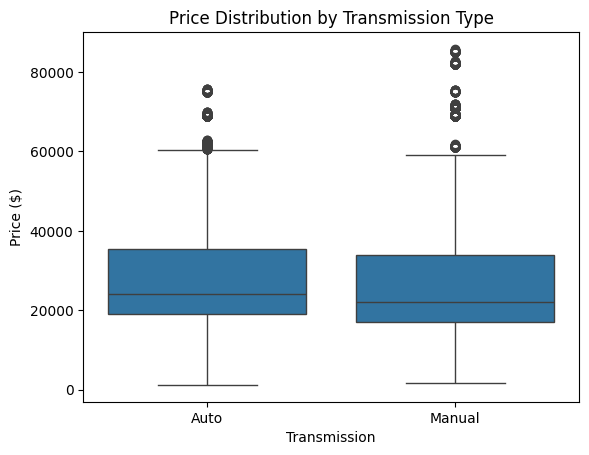

In [18]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Price Distribution by Transmission Type')
plt.show()

In [19]:
# 5. What is the distribution of cars based on body styles?
body_style_count = df['Body Style'].value_counts()
print(body_style_count)


Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [20]:
# 6. How does the average selling price of cars vary by customer gender and annual income?
print(df.groupby('Gender')[['Annual Income', 'Price ($)']].mean())

        Annual Income     Price ($)
Gender                             
Female  755973.021339  28277.265270
Male    851184.044207  28039.429407


In [21]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
region_price = df.groupby('Dealer_Region')['Price ($)'].describe()
region_sales = df['Dealer_Region'].value_counts()
print(region_price)
print(region_sales)

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

In [22]:
# 8. How does the average car price differ between cars with different engine sizes?
print(df.groupby('Engine')['Price ($)'].mean())

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [23]:
# 9. How do car prices vary based on the customer’s annual income bracket?
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=[0, 30000, 60000, 100000, 200000],
                              labels=['Low', 'Medium', 'High', 'Very High'])
print(df.groupby('Income_Bracket')['Price ($)'].mean())

Income_Bracket
Low          27884.297820
Medium                NaN
High         43000.000000
Very High    22833.666667
Name: Price ($), dtype: float64


<ipython-input-23-0650c574d9b6>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Income_Bracket')['Price ($)'].mean())


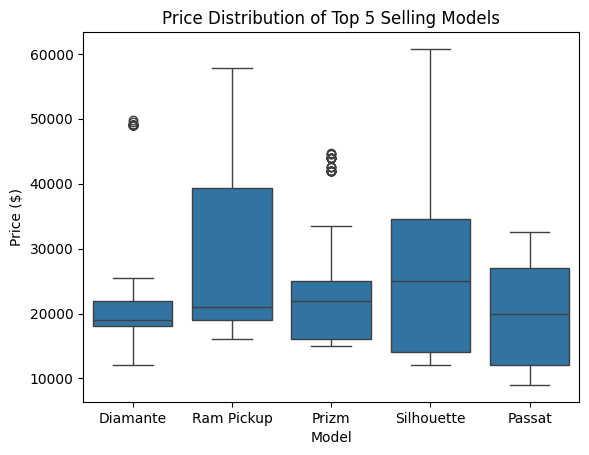

In [24]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = df['Model'].value_counts().nlargest(5).index
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_models)])
plt.title('Price Distribution of Top 5 Selling Models')
plt.show()

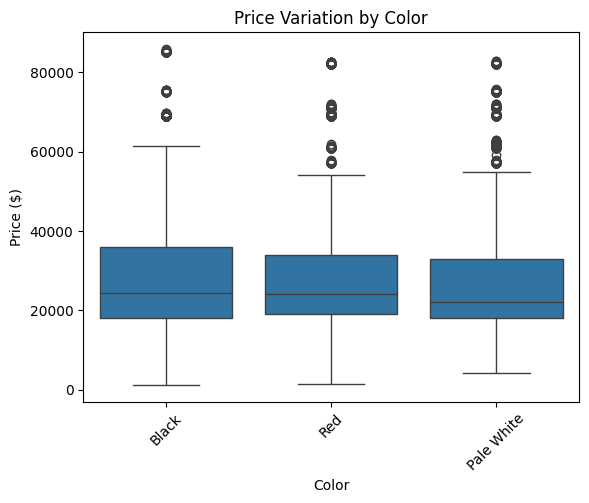

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [25]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
sns.boxplot(x='Color', y='Price ($)', data=df)
plt.title('Price Variation by Color')
plt.xticks(rotation=45)
plt.show()

print(df.groupby('Color')['Price ($)'].std().sort_values(ascending=False))

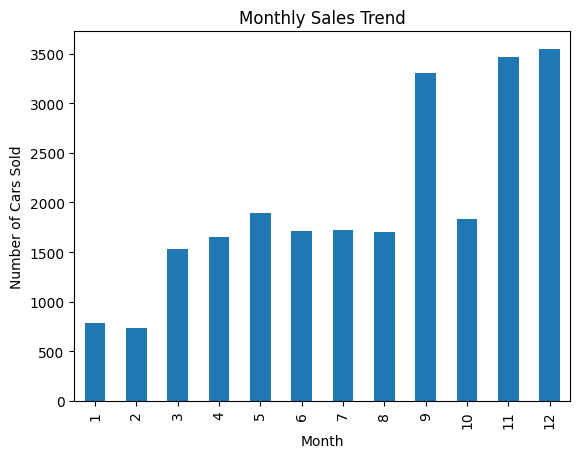

In [26]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
df['Month'] = df['Date'].dt.month
monthly_sales = df['Month'].value_counts().sort_index()
monthly_sales.plot(kind='bar', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.show()

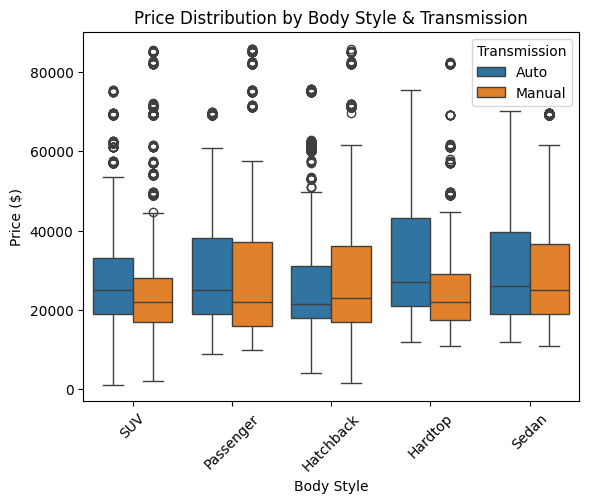

In [27]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Price Distribution by Body Style & Transmission')
plt.xticks(rotation=45)
plt.show()

In [28]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
# Note: Engine must be numeric or encoded; assuming only Annual Income and Price ($) are used here
print(df[['Price ($)', 'Annual Income']].corr())

               Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


In [29]:
# 15. How does the average car price vary across different car models and engine types?
print(df.groupby(['Model', 'Engine'])['Price ($)'].mean().sort_values(ascending=False).head(10))


Model        Engine                   
SC           Overhead Camshaft            61074.818182
Ranger       DoubleÂ Overhead Camshaft    61064.055556
Sable        Overhead Camshaft            61039.770833
Catera       DoubleÂ Overhead Camshaft    56836.933333
LX470        Overhead Camshaft            54037.490196
LS400        Overhead Camshaft            53157.941558
GS400        Overhead Camshaft            53086.000000
Tacoma       DoubleÂ Overhead Camshaft    53085.821918
Aurora       Overhead Camshaft            51833.556962
Park Avenue  DoubleÂ Overhead Camshaft    49387.750000
Name: Price ($), dtype: float64


# **EDA – 3**
# **Amazon Sales Data**

**Description:**
This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

**Features:**

product_id: Unique identifier for each product

product_name: Name of the product

category: Category of the product

discounted_price: Discounted price of the product

actual_price: Actual price of the product

discount_percentage: Percentage of discount for the product

rating: Rating of the product (1–5)

rating_count: Number of people who voted for the Amazon rating

about_product: Description about the product

user_id: ID of the user who wrote the review

user_name: Name of the user who wrote the review

review_id: ID of the user review

review_title: Short review

review_content: Long review

img_link: Image link of the product

product_link: Official website link of the product

Source: Amazon Sales

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("amazon.csv")

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


# ---------------------------
# 1. What is the average rating for each product category?
# Now that 'rating' is numeric, the mean can be calculated
avg_rating_by_category = df.groupby('category')['rating'].mean()
print(avg_rating_by_category)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [34]:
# 2. What are the top rating_count products by category?
top_rated_products = df.sort_values('rating_count', ascending=False).groupby('category').head(1)
print(top_rated_products[['category', 'product_name', 'rating_count']])

                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
977   Electronics|Headphones,Earbuds&Accessories|Hea...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
151   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
895   Home&Kitchen|CraftMaterials|DrawingMaterials|D...   
941   Computers&Accessories|Printers,Inks&Accessorie...   
526   Electronics|Mobiles&Accessories|MobileAccessor...   
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
1399  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   

                                           product_name rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992  
750        Eveready Red 1012 AAA Batteries - Pack of 10          989  
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250  
1059  P

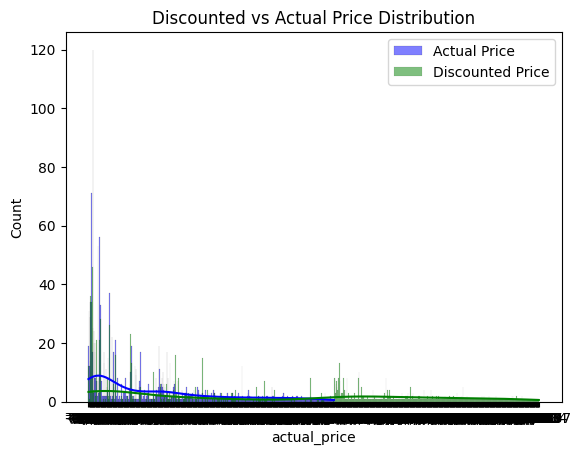

In [35]:
# 3. What is the distribution of discounted prices vs. actual prices?
sns.histplot(df['actual_price'], color='blue', label='Actual Price', kde=True)
sns.histplot(df['discounted_price'], color='green', label='Discounted Price', kde=True)
plt.legend()
plt.title('Discounted vs Actual Price Distribution')
plt.show()

In [42]:
# 4. How does the average discount percentage vary across categories?
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=False).astype(float)

avg_discount_by_category = df.groupby('category')['discount_percentage'].mean()
print(avg_discount_by_category)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

In [37]:
# 5. What are the most popular product names?
popular_products = df['product_name'].value_counts().head(10)
print(popular_products)

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                                             

In [38]:
# 6. What are the most popular product keywords?
# Assuming keywords can be found in 'about_product' column
from collections import Counter
import re

all_words = ' '.join(df['about_product'].dropna()).lower()
keywords = re.findall(r'\b[a-z]{4,}\b', all_words)
top_keywords = Counter(keywords).most_common(10)
print(top_keywords)

[('with', 3143), ('your', 1869), ('cable', 919), ('this', 894), ('from', 779), ('warranty', 733), ('charging', 662), ('type', 633), ('easy', 613), ('high', 603)]


In [39]:
# 7. What are the most popular product reviews?
top_reviews = df['review_content'].value_counts().head(10)
print(top_reviews)

review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a littl

In [43]:
# 8. What is the correlation between discounted_price and rating?
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')


# 8. What is the correlation between discounted_price and rating?
# Both 'discounted_price' and 'rating' are now numeric.
correlation = df[['discounted_price', 'rating']].corr()
print(correlation)

                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


In [44]:
# 9. What are the Top 5 categories based on the highest ratings?
top_categories_by_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_categories_by_rating)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


In [ ]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis.
# Sample Ideas (customize based on actual results):
# - Categories with low ratings but high discount could suggest quality issues.
# - Products with high views but low sales may need better descriptions or images.
# - Keywords in low-performing products could be optimized using SEO analysis.


# **EDA – 4**
Dataset Link: Spotify Data: Popular Hip-Hop Artists and Tracks 🎵

**Description of the Dataset:**
The dataset titled "Spotify Data: Popular Hip–hop Artists and Tracks" provides a curated collection of approximately 500 entries showcasing the vibrant realm of hip–hop music. These entries meticulously compile the most celebrated hip–hop tracks and artists, reflecting their significant influence on the genre's landscape. Each entry not only highlights the popularity and musical composition of the tracks but also underscores the creative prowess of the artists and their profound impact on global listeners.

**Application in Data Science:**
This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend analysis to discern the popularity dynamics of hit hip–hop tracks over recent years. Additionally, the dataset enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

**Column Descriptors:**
Artist: The name of the artist, providing direct attribution to the creative mind behind the track.

Track Name: The title of the track, encapsulating its identity and essence.

Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.

Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.

Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further exploration.

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("spotify.csv")

# ---------------------------
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful.
print(df.isnull().sum())
df = df.dropna()  # drop rows with any nulls
df = df.drop_duplicates()  # remove duplicates

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


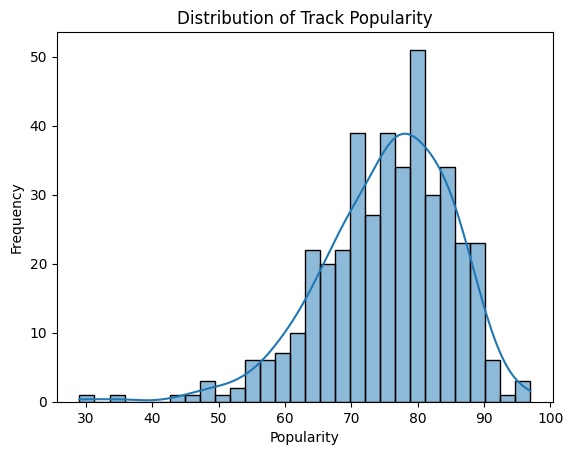

In [46]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
sns.histplot(df['Popularity'], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

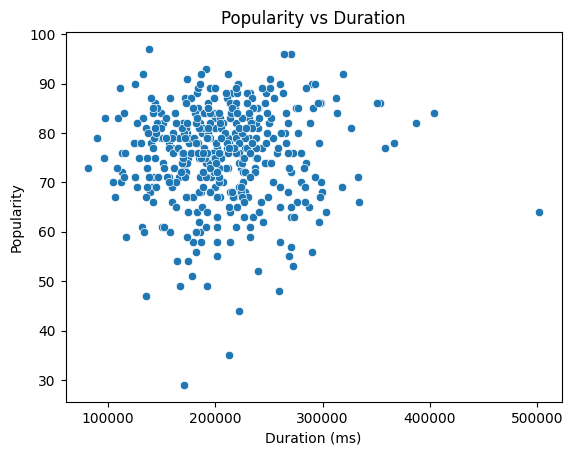

In [47]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity')
plt.title("Popularity vs Duration")
plt.show()

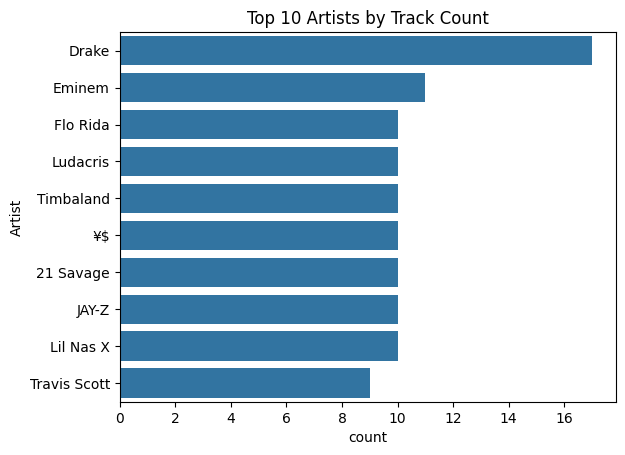

In [48]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
top_artists = df['Artist'].value_counts().head(10)
sns.countplot(y='Artist', data=df[df['Artist'].isin(top_artists.index)], order=top_artists.index)
plt.title("Top 10 Artists by Track Count")
plt.show()

In [49]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print(least_popular)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [50]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
top_artists_by_count = df['Artist'].value_counts().nlargest(5).index
avg_popularity = df[df['Artist'].isin(top_artists_by_count)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print(avg_popularity)

Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64


In [51]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
for artist in top_artists_by_count:
    top_track = df[df['Artist'] == artist].sort_values('Popularity', ascending=False).iloc[0]
    print(f"{artist} → {top_track['Track Name']} (Popularity: {top_track['Popularity']})")


Drake → Rich Baby Daddy (feat. Sexyy Red & SZA) (Popularity: 92)
Eminem → Without Me (Popularity: 90)
Flo Rida → Low (feat. T-Pain) (Popularity: 84)
Ludacris → My Chick Bad (Popularity: 67)
Timbaland → The Way I Are (Popularity: 85)


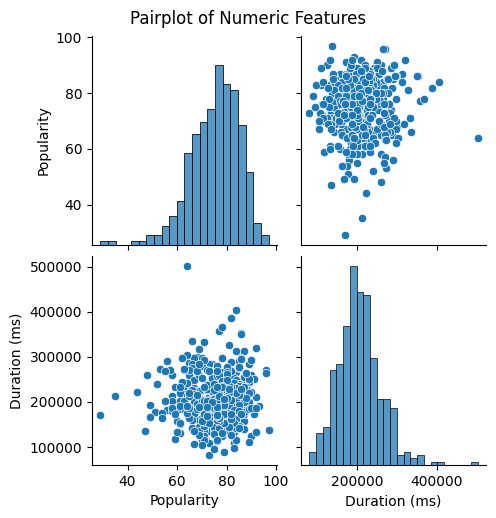

In [52]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

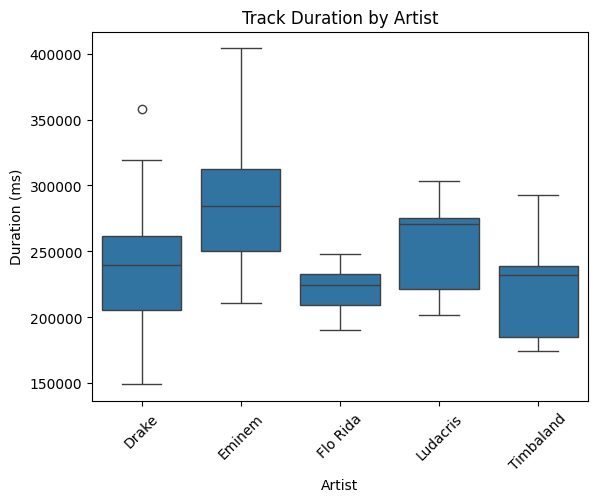

In [53]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
top_artists_duration = df[df['Artist'].isin(top_artists_by_count)]
sns.boxplot(data=top_artists_duration, x='Artist', y='Duration (ms)')
plt.xticks(rotation=45)
plt.title("Track Duration by Artist")
plt.show()

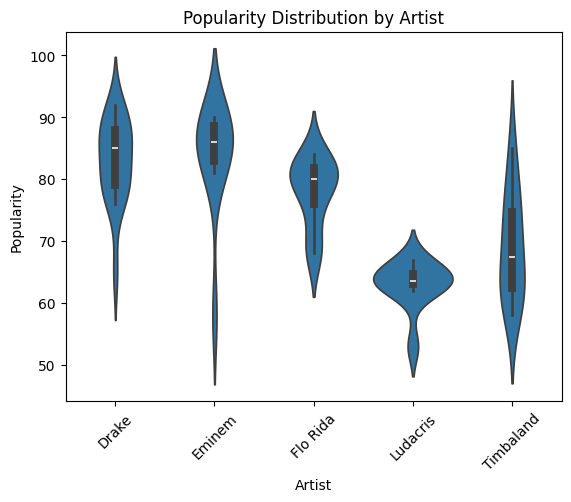

In [54]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
sns.violinplot(data=top_artists_duration, x='Artist', y='Popularity')
plt.xticks(rotation=45)
plt.title("Popularity Distribution by Artist")
plt.show()